TODO: <br>
d3py <br>
pygraphviz <br>
netgraph <br>
[pyviz](https://pyvis.readthedocs.io/en/latest/) <br>

### bokeh

[edges](https://stackoverflow.com/questions/50064192/how-to-add-edge-labels-interactive-or-permanent-ones-for-networkx-graph-in-bok) <br>
[nodes](https://stackoverflow.com/questions/49848966/how-to-add-permanent-name-labels-not-interactive-ones-on-nodes-for-a-networkx)

In [10]:
import pandas as pd

In [13]:
import math

from bokeh.io import show, output_file
from bokeh.plotting import figure
from bokeh.models import GraphRenderer, StaticLayoutProvider, Oval
from bokeh.palettes import Spectral8

In [22]:
N = 8
node_indices = list(range(N))

plot = figure(title='Graph Layout Demonstration', x_range=(-1.1,1.1), y_range=(-1.1,1.1),
              tools='', toolbar_location=None)

graph = GraphRenderer()

In [25]:
graph.edge_renderer.data_source.data

{'start': [0, 0, 0, 0, 0, 0, 0, 0], 'end': [0, 1, 2, 3, 4, 5, 6, 7]}

In [24]:
graph.node_renderer.data_source.add(node_indices, 'index')
graph.node_renderer.data_source.add(Spectral8, 'color')
graph.node_renderer.glyph = Oval(height=0.1, width=0.2, fill_color='color')

graph.edge_renderer.data_source.data = dict(
    start=[0]*N,
    end=node_indices)

In [26]:
### start of layout code
circ = [i*2*math.pi/8 for i in node_indices]
x = [math.cos(i) for i in circ]
y = [math.sin(i) for i in circ]

In [27]:
graph_layout

{0: (1.0, 0.0),
 1: (0.7071067811865476, 0.7071067811865475),
 2: (6.123233995736766e-17, 1.0),
 3: (-0.7071067811865475, 0.7071067811865476),
 4: (-1.0, 1.2246467991473532e-16),
 5: (-0.7071067811865477, -0.7071067811865475),
 6: (-1.8369701987210297e-16, -1.0),
 7: (0.7071067811865474, -0.7071067811865477)}

In [30]:
graph_layout = dict(zip(node_indices, zip(x, y)))
graph.layout_provider = StaticLayoutProvider(graph_layout=graph_layout)

In [58]:
plot.renderers[0]

GraphRenderer(id='1377', ...)

In [28]:
plot.renderers.append(graph)

In [31]:
output_file('graph.html')
show(plot)

### NetworkX 
[src](https://networkx.github.io/documentation/networkx-1.10/tutorial/tutorial.html) <br>
[intersting source](https://python-graph-gallery.com/325-map-colour-to-the-edges-of-a-network/) <br>
[labels on edges](https://stackoverflow.com/questions/47094949/labeling-edges-in-networkx)


In [35]:
import networkx as nx

In [36]:
G=nx.Graph()

In [41]:
# add nodes
G.add_node('gg')

In [43]:
# add several nodes
G.add_nodes_from([2,3])

In [52]:
# list of nodes
G.nodes()

NodeView((1, 'gg', 2, 3, 'ff'))

In [50]:
# add edge (note that does not important wheather new node in nodes)
G.add_edge(1,'ff')

In [57]:
G.edges

EdgeView([(1, 2), (1, 'ff'), (1, 3), (2, 3)])

In [54]:
#add from tuple
e=(2,3)
G.add_edge(*e)

In [56]:
# add from list 
G.add_edges_from([(1,2),(1,3)])

In [59]:
# number of nodes and edges
print(G.number_of_edges())
print(G.number_of_nodes())

4
5


In [65]:
# list of values linked with node
list(G.neighbors('gg'))

[]

In [79]:
# access to sing node 
G[1]['ff']['hi'] = 'shoha'

In [86]:
# adjacenty matrix
G.adj

AdjacencyView({1: {2: {}, 'ff': {'color': 'blue', 'hi': 'shoha'}, 3: {}}, 'gg': {}, 2: {1: {}, 3: {}}, 3: {2: {}, 1: {}}, 'ff': {1: {'color': 'blue', 'hi': 'shoha'}}})

In [87]:
#  graph attributes
G.graph

{}

In [91]:
# analysis 
nx.degree(G)

DegreeView({1: 3, 'gg': 0, 2: 2, 3: 2, 'ff': 1})

In [157]:
# drawing
import matplotlib.pyplot as plt
import pandas as pd
import scipy
df = pd.read_excel('rel.xlsx')

In [201]:
df = pd.read_csv('p.csv')
df = df[['source', 'target', 'weight']]
G=nx.from_pandas_edgelist(df, 'source', 'target', create_using=nx.Graph())

In [197]:
G=nx.karate_club_graph()

In [163]:
df = df.drop(df.columns[0], axis=1)

In [164]:
df.head()

,subject,object,relation
0,Future,Author,PROCESS_OF
1,Future,Status,ISA
2,Status,Author,PROCESS_OF
3,Relative,Type - attribute,PROCESS_OF
4,Relative,result,ISA


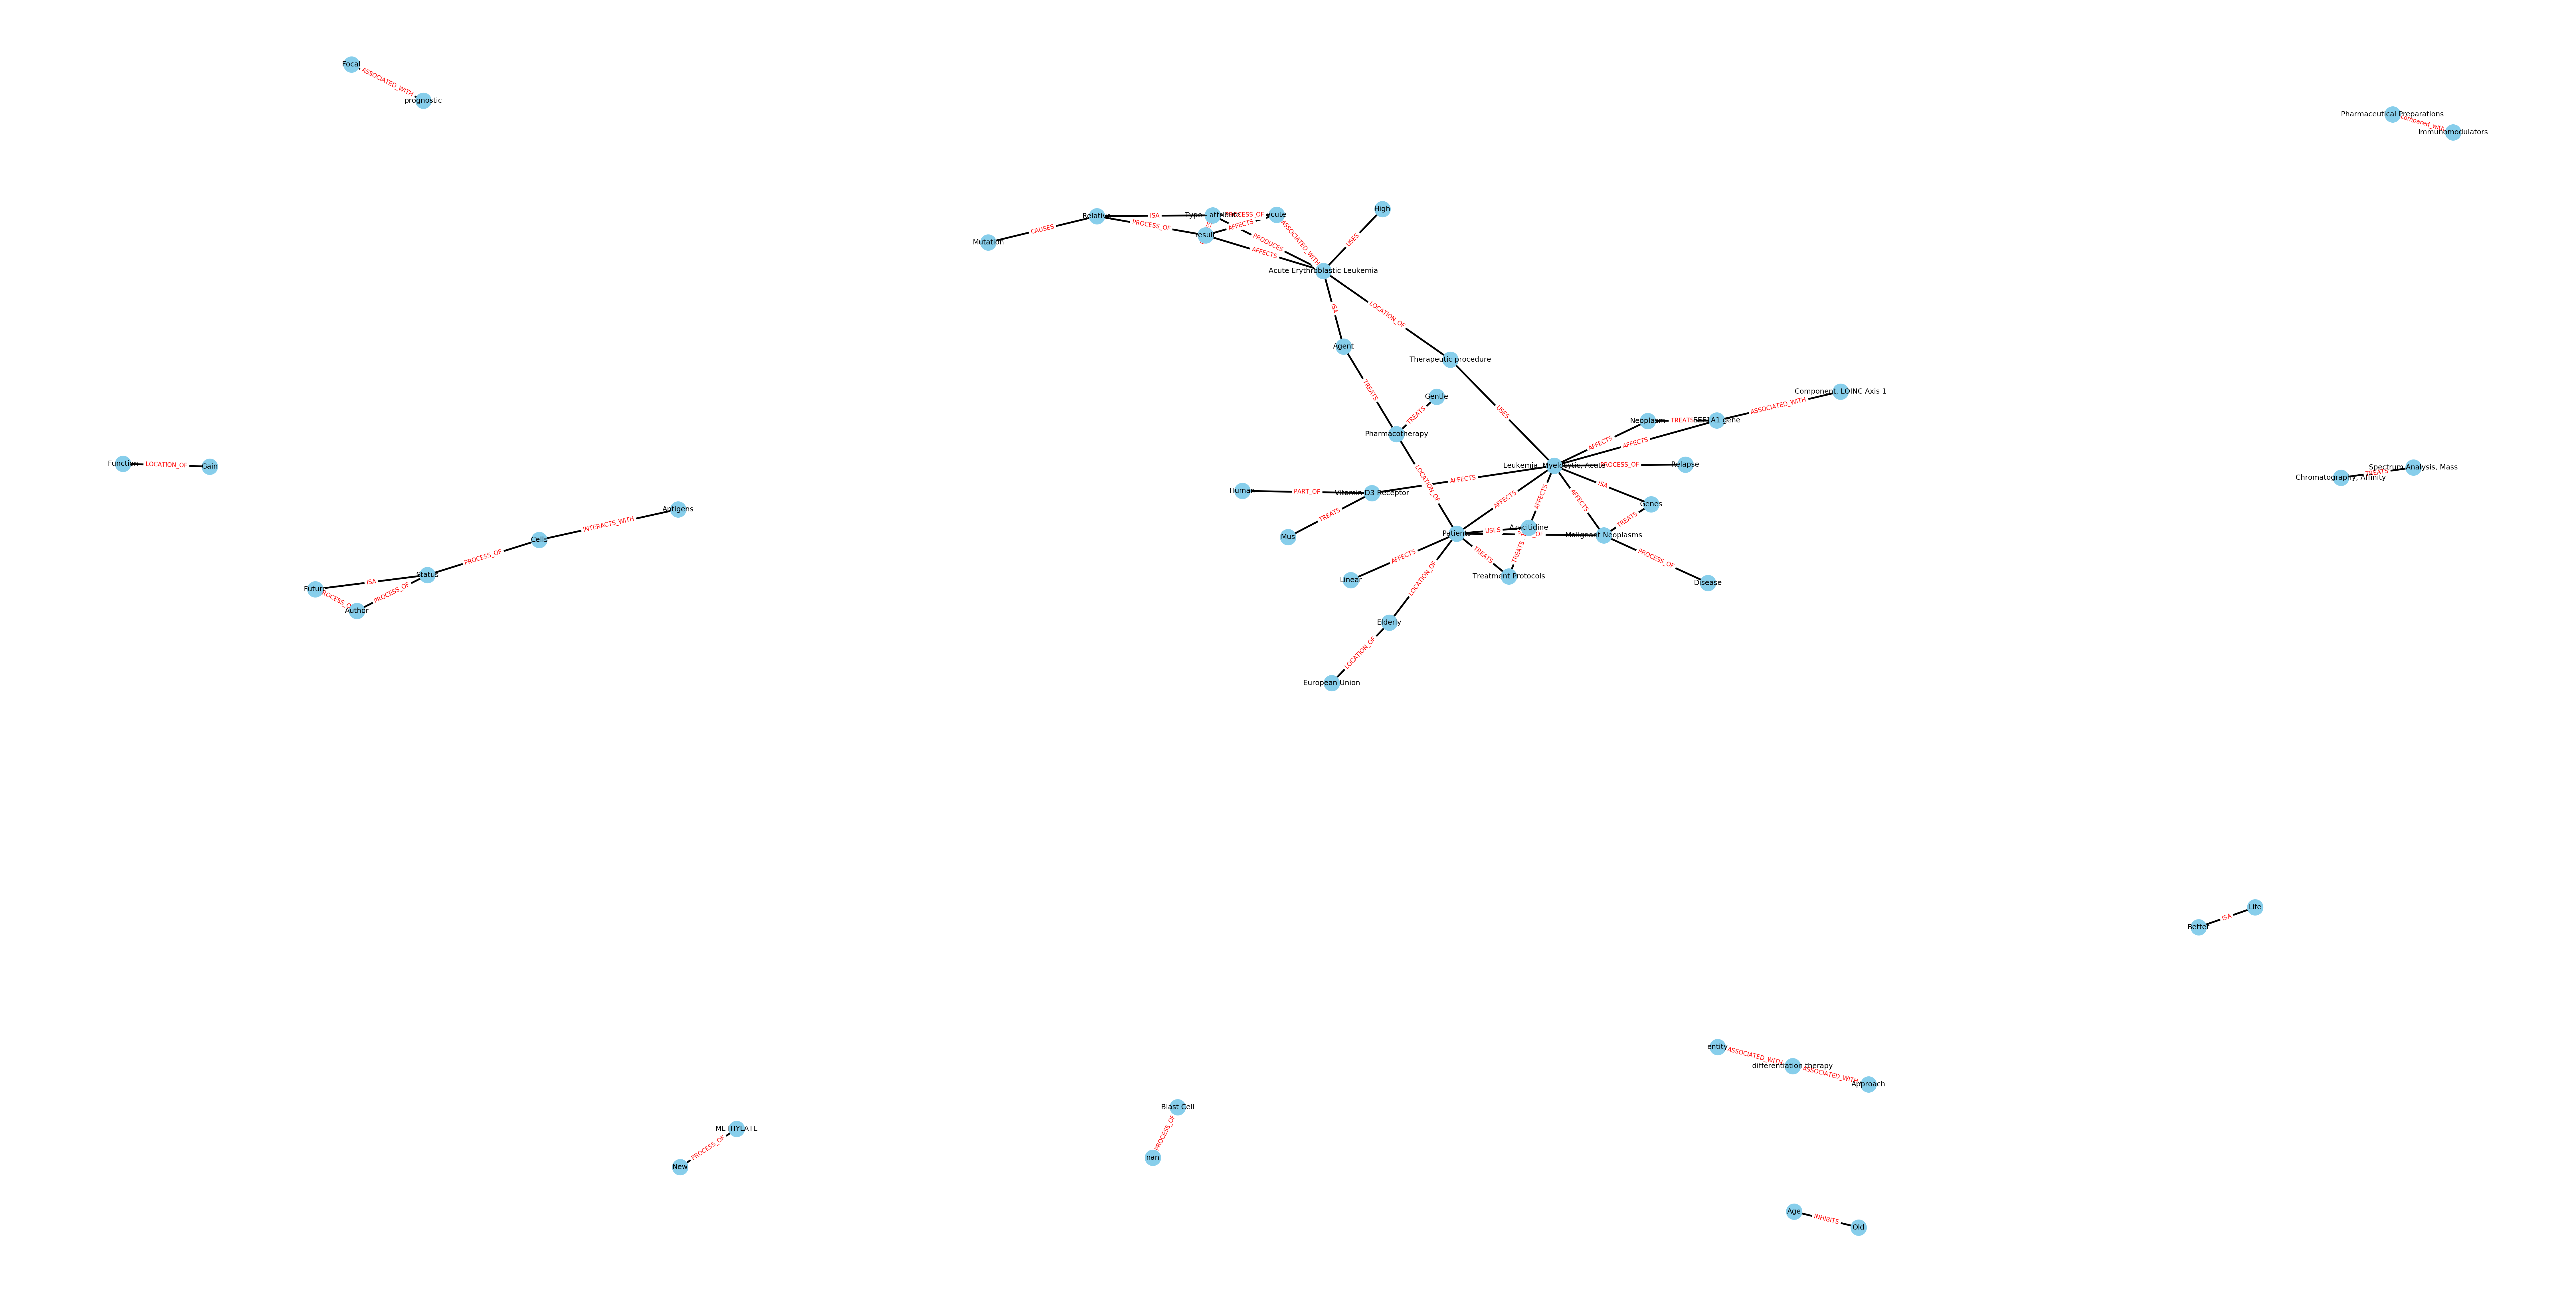

/home/serge/Desktop/graph/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  from ipykernel import kernelapp as app


<Figure size 432x288 with 0 Axes>

In [188]:
G=nx.from_pandas_edgelist(df, 'subject', 'object', create_using=nx.Graph() )

# Custom the nodes:
plt.figure(figsize=(60,30), dpi=150)

pos = nx.spring_layout(G)

nx.draw(G, pos,with_labels=True, node_color='skyblue', node_size=700,width=3, edge_cmap=plt.cm.Blues)
nx.draw_networkx_edge_labels(G,pos,edge_labels={i:ii for i, ii in  zip(dict(G.edges()),df['relation'])},font_color='red')
plt.axis('off')
plt.show()
plt.savefig('test.png', dpi=300, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)

In [202]:
G.adj

AdjacencyView({'Beds': {'Materials': {}}, 'Materials': {'Beds': {}}, 'biological': {'Quality': {}}, 'Quality': {'biological': {}}, 'Oils': {'Rate': {}}, 'Rate': {'Oils': {}}, 'Appropriate': {'Rapid': {}, 'Temperature': {}}, 'Rapid': {'Appropriate': {}}, 'Temperature': {'Appropriate': {}}})

In [203]:
G.nodes()

NodeView(('Beds', 'Materials', 'biological', 'Quality', 'Oils', 'Rate', 'Appropriate', 'Rapid', 'Temperature'))

In [204]:
G.edges()

EdgeView([('Beds', 'Materials'), ('biological', 'Quality'), ('Oils', 'Rate'), ('Appropriate', 'Rapid'), ('Appropriate', 'Temperature')])

In [193]:
import networkx as nx

from bokeh.io import show, output_file
from bokeh.plotting import figure
from bokeh.models.graphs import from_networkx


plot = figure(title="Networkx Integration Demonstration", tools="", toolbar_location=None)

graph = from_networkx(G, nx.spring_layout)
plot.renderers.append(graph)

output_file("networkx_graph.html")
show(plot)